# Cálculos en ingeniería con Sympy y Jupyter Notebooks




## Cuadros de texto con ecuaciones

El editor permite escribir ecuaciones en [$\LaTeX$](). Al dar "`Doble click`", puede ver cómo se escriben tales expresiones.

$$ f(a) = \int_\infty^0 \frac{1}{a+2} \mathrm{d}a$$


## Símbolos especiales en los nombres

Para nombrar una variable con un símbolo especial, use  "`\`" seguido del nombre del símbolo y presione "`tab`".

**Ejemplo**

Escriba `\alpha` y presione "`tab`" para usar α en el código.

In [1]:
α = 1
print(α)


1


## SymPy

Se importa el módulo [SymPy](http://docs.sympy.org/latest/index.html) para desarrollar operaciones matemáticas de forma simbólica, debe importase. Además se inicia un proceso de "impresión estética" para la visualización de expresiones y uno de "gráficas incorporadas".

In [2]:
import sympy as sym
sym.init_printing()
%matplotlib inline

Se definen símbolos para operarlos matemáticamente.

In [3]:
x = sym.Symbol('x')

In [4]:
x

Se realizan operaciones matemáticas con los símbolos creados.

In [5]:
polinomio = (x + 2)**3
polinomio.factor()

"`polinomio`" se creó como una operación que usa el símbolo "`x`". Después, se usó el método "`.expand()`" para expandir el "`polinomio`".

Puede tener un listado de métodos que puede usar sobre "`polinomio`" escribiendo "`polinomio.`" y presionando "`tab`"

In [6]:
polinomio.

SyntaxError: invalid syntax (<ipython-input-6-c76aa7c4b67c>, line 1)

Puede obtener ayuda de un método con "`?`".

In [7]:
polinomio.expand?

También puede obtener ayuda de un método al ubicar el cursor entre el paréntesis y presionar "`Shift+Tab`"

In [8]:
polinomio.factor()

## Cálculo

Puede resolver integrales y derivadas.

In [9]:
expresionA = sym.tan(sym.log(x**2 + 1)) # define una expresión 
expresionA

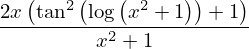

In [10]:
expresionA.diff(x) # deriva "expresionA" respecto a "x"

In [11]:
polinomio.diff(x) # primera derivada

In [12]:
polinomio

In [13]:
polinomio.diff(x, 2) # segunda derivada

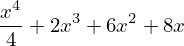

In [14]:
polinomio.integrate(x) # integral indefinida sin constante de integración

In [15]:
polinomio.integrate((x, 0, 1))  # integral definida. Observe la tupla como argumento

## Límites

Puede resolver límites.

In [16]:
expresionB = (2*sym.sin(x) - sym.sin(2*x))/(x - sym.sin(x))

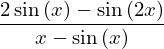

In [17]:
expresionB

In [18]:
a = sym.symbols('a')

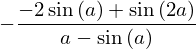

In [19]:
lim_a = sym.limit(expresionB, x, a)
lim_a

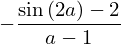

In [20]:
lim_a.subs(sym.sin(a), 1)

In [21]:
lim_0 = sym.limit(expresionB, x, 0)
lim_0

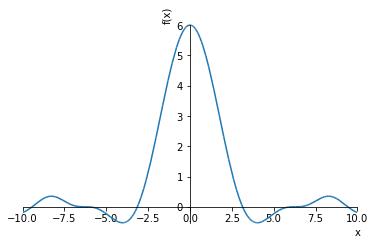

In [22]:
sym.plot(expresionB)

## Aproximaciones

Puede aproximar funciones con la serie de Taylor.

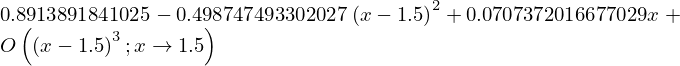

In [23]:
expresionC = sym.sin(x)
sym.series(expresionC, x, 1.5, 3) 
# Serie de Taylor en términos de x, al rededor de x=1.5, orden 2.

Use `.removeO()`

In [24]:
temp = sym.series(expresionC, x, 1.5, 2)
temp.removeO()

SymPy mantiene la representación exacta de los números, aunque pueden aproximarse con "`float`" o "`sympy.N`" si hay variables.

In [25]:
c = sym.sqrt(2)*sym.pi
c

In [26]:
round(float(c)*1000)/1000

In [27]:
sym.N(c*x)

## Solución de ecuaciones



Si se buscan los valores de $x$ que satisfagan la ecuación 

$$2x^2 + 2 = 4$$

Debe realizarse una serie de procedimientos.

- Se resta 2 a ambos lados de la ecuación.
\begin{align}
           2x^2 + 2 - 2 &= 4 - 2 \\
                  2x^2  &= 2 \\
\end{align}

- Se divide en 2 a ambos lados de la ecuación.
\begin{align}
    \frac{2x^2}{2}  &= \frac{2}{2} \\
    x^2  &= 1
\end{align}

- Se saca raíz cuadrada a ambos lados de la ecuación teniendo en cuenta que elevar al cuadrado elimina signos.
\begin{align}
    \sqrt{x^2}  &= \sqrt{1} \\
    |x|  &= 1 \\
    x &= \pm 1
\end{align}


Le ecuación anterior puede entenderse como la intersección de las curvas definidas por las expresiones $g_1:2x^2 + 2$ y $g_2:4$. Que puede revisarse de forma gráfica.

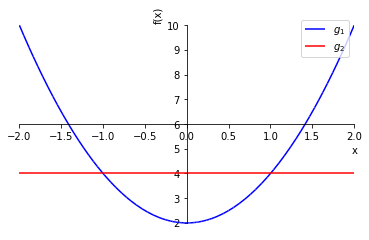

In [49]:
g1 = 2*x**2 + 2
g2 = 4
graf = sym.plot(g1,g2,(x, -2, 2),show = False)
graf[0].label = r'$g_1$'
graf[0].line_color = 'b'
graf[1].label = r'$g_2$'
graf[1].line_color = 'r'
graf.legend = True
graf.show();

Puede declarar la ecuación con el método `Eq` y encontrar sus raíces con el método `roots`

In [53]:
eqA = sym.Eq(2*x**2 + 2, 4)
eqA

In [54]:
sym.roots(eqA)

También puede resolver la ecuación planteando:

$$g_1 = 2x^2 + 2$$
$$g_2=4$$
$$g_1 - g_2 = 0$$

El método `solve` resuelve este último planteamiento.

In [55]:
g1 = 2*x**2 + 2
g2 = 4
soluciones = sym.solve(g1-g2)
soluciones

Puede resolverse un sistema de ecuaciones.

In [57]:
x, y = sym.symbols('x, y')
sym.solve([x + y - 2, 
           x - y - 0], [x, y])

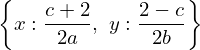

In [58]:
a, b, c = sym.symbols('a, b, c')
sym.solve([a*x + b*y - 2,
           a*x - b*y - c], [x, y])